Fashion mnist:
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


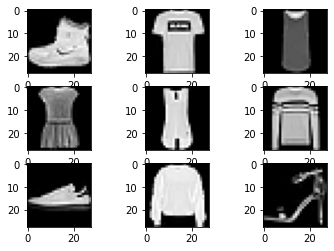

In [3]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist, cifar10
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
(trainX_ci, trainy_ci), (testX_ci, testy_ci) = cifar10.load_data()
print('Fashion mnist:')
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

Cifar:
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


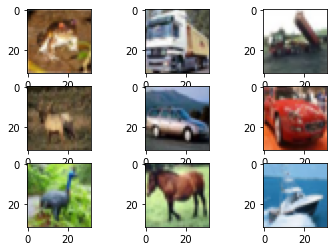

In [4]:
print('Cifar:')
print('Train: X=%s, y=%s' % (trainX_ci.shape, trainy_ci.shape))
print('Test: X=%s, y=%s' % (testX_ci.shape, testy_ci.shape))
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX_ci[i])
pyplot.show()

In [5]:
import cv2

In [6]:
import numpy as np

(32, 32, 3)


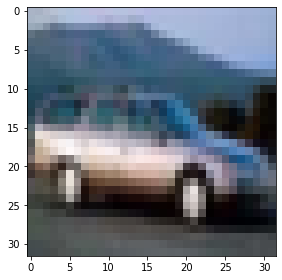

In [7]:
#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
#reading the image
img = trainX_ci[4]
imshow(img)
print(img.shape)

In [8]:
def hog_func(img, is_multi=False, orientations=15, pixels_per_cell=(8,8), cells_per_block=(2,2)):
  resized_img = resize(img, (128,64))
  
  fd, hog_image = hog(resized_img, 
                      multichannel=is_multi,
                      orientations=orientations, 
                      pixels_per_cell=pixels_per_cell,
                      cells_per_block=cells_per_block, 
                      visualize=True)
  return hog_image

In [13]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([hog_func(img) for img in trainX[:100]])
X = X.reshape(X.shape[0], -1)
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
kmeans.labels_

array([8, 2, 6, 6, 1, 7, 4, 7, 8, 8, 2, 9, 4, 4, 4, 8, 5, 2, 7, 6, 1, 1,
       6, 8, 7, 0, 2, 7, 7, 7, 4, 1, 7, 6, 6, 6, 8, 2, 5, 7, 7, 4, 8, 4,
       9, 7, 4, 1, 2, 0, 1, 1, 4, 7, 6, 2, 6, 6, 1, 6, 8, 6, 4, 4, 1, 2,
       2, 1, 7, 5, 2, 5, 6, 1, 3, 7, 6, 2, 5, 8, 5, 6, 8, 4, 8, 4, 5, 4,
       9, 8, 8, 1, 6, 8, 1, 7, 6, 3, 5, 8], dtype=int32)

In [23]:

pred = kmeans.predict(np.array([hog_func(img) for img in testX[:10]]).reshape(10, -1))


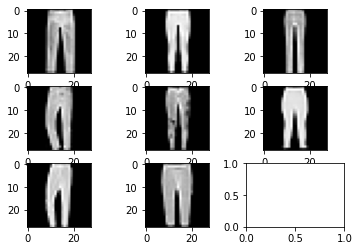

In [22]:
imgs = trainX[:100][kmeans.labels_==5]
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  try:
    pyplot.imshow(imgs[i], cmap=pyplot.get_cmap('gray'))
  except:
    pass
pyplot.show()

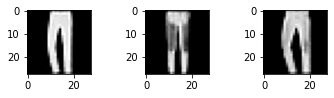

In [26]:
imgs = testX[:10][pred==5]
for i in range(3):
  pyplot.subplot(330 + 1 + i)
  try:
    pyplot.imshow(imgs[i], cmap=pyplot.get_cmap('gray'))
  except:
    pass
pyplot.show()